## Initializing enviroment:

In [1]:
path_file = "https://raw.githubusercontent.com/Alfonsogar/master_ds_project/master"

import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline

## Reading data:

In [2]:
movies = pd.read_csv(path_file + '/movies.csv', header=0)

In [3]:
ratings = pd.read_csv(path_file + '/ratings.csv', header=0)

In [4]:
tags = pd.read_csv(path_file + '/tags.csv', header=0)

In [5]:
links = pd.read_csv(path_file + '/links.csv', header=0)

## Profiling & cleaning data:

### Movies:

In [6]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [7]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [8]:
# formatting data:
movies['movieId'] = movies['movieId'].astype('str')

In [9]:
movies.describe()
# we can see we have duplicates on the title column.

movieId          title genres
count     9125           9125   9125
unique    9125           9123    902
top      26686  Hamlet (2000)  Drama
freq         1              2   1170

In [10]:
movies[movies['title'].duplicated()]

movieId                     title         genres
7127   64997  War of the Worlds (2005)  Action|Sci-Fi
7151   65665             Hamlet (2000)          Drama

In [11]:
# Let's see this movies.
movies[(movies['title'] == 'War of the Worlds (2005)') | (movies['title'] == 'Hamlet (2000)')]

movieId                     title                            genres
2872    3598             Hamlet (2000)      Crime|Drama|Romance|Thriller
6172   34048  War of the Worlds (2005)  Action|Adventure|Sci-Fi|Thriller
7127   64997  War of the Worlds (2005)                     Action|Sci-Fi
7151   65665             Hamlet (2000)                             Drama

In [12]:
# We can see that we have more descriptive movies on the rows 2872 and 6172 so we will remove the other two.
movies.drop(movies.index[[7127, 7151]], inplace=True)

In [13]:
# Too many different genres (because of the combination)
movies['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Documentary|IMAX', 'Children|Comedy',
       'Drama|War', 'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Mystery',
       'Drama|Thriller', 'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Com

In [14]:
# We will split them into separated words.

movies['genres'] = movies['genres'].str.replace('|', ' ')

   ### Ratings:

In [15]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [16]:
# Formatting:
ratings['userId'] = ratings['userId'].astype('str')
ratings['movieId'] = ratings['movieId'].astype('str')

In [17]:
# Formatting dates:
def to_date (value):
        date = datetime.fromtimestamp(value).strftime('%d %B %Y - %I:%M:%S')
        return date
    
ratings['timestamp'] = ratings['timestamp'].apply(to_date)
ratings['timestamp'] = pd.to_datetime(ratings['timestamp']) # convert object to timestamp  year-month-day
    

In [18]:
ratings.describe(include='all')

userId movieId         rating            timestamp
count   100004  100004  100004.000000               100004
unique     671    9066            NaN                78126
top        547     356            NaN  2016-07-23 02:54:42
freq      2391     341            NaN                   87
first      NaN     NaN            NaN  1995-01-09 12:46:49
last       NaN     NaN            NaN  2016-10-16 07:57:24
mean       NaN     NaN       3.543608                  NaN
std        NaN     NaN       1.058064                  NaN
min        NaN     NaN       0.500000                  NaN
25%        NaN     NaN       3.000000                  NaN
50%        NaN     NaN       4.000000                  NaN
75%        NaN     NaN       4.000000                  NaN
max        NaN     NaN       5.000000                  NaN

In [19]:
ratings.head()

userId movieId  rating           timestamp
0      1      31     2.5 2009-12-14 03:52:24
1      1    1029     3.0 2009-12-14 03:52:59
2      1    1061     3.0 2009-12-14 03:53:02
3      1    1129     2.0 2009-12-14 03:53:05
4      1    1172     4.0 2009-12-14 03:53:25

### Tags:

In [20]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [21]:
tags['userId'] = tags['userId'].astype('str')
tags['movieId'] = tags['movieId'].astype('str')
def to_date (value):
        date = datetime.fromtimestamp(value)#.strftime('%d %B %Y - %I:%M:%S')
        return date
    
tags['timestamp'] = tags['timestamp'].apply(to_date)

In [22]:
tags.head()

userId movieId                      tag           timestamp
0     15     339  sandra 'boring' bullock 2006-01-29 13:29:30
1     15    1955                  dentist 2007-10-26 23:44:21
2     15    7478                 Cambodia 2007-02-04 04:49:57
3     15   32892                  Russian 2007-02-04 22:59:26
4     15   34162              forgettable 2006-03-03 14:16:05

In [23]:
tags.describe()

userId movieId     tag            timestamp
count    1296    1296    1296                 1296
unique     61     689     582                 1245
top       547     260  getdvd  2006-02-20 18:07:55
freq      401      25      33                    4
first     NaN     NaN     NaN  2006-01-14 06:44:00
last      NaN     NaN     NaN  2016-10-16 22:45:44

### Links:

In [24]:
links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [25]:
links['movieId'] = links['movieId'].astype('str')
links['imdbId'] = links['imdbId'].astype('str')
links['tmdbId'] = links['tmdbId'].astype('str')

In [26]:
links.dtypes

movieId    object
imdbId     object
tmdbId     object
dtype: object

## Profiling

In [27]:
len(ratings['userId'].unique())   # number of usersratings

671

In [28]:
sum(ratings.duplicated(subset=("userId", "movieId")))

0

In [29]:
ratings.groupby('userId').count().sort_values('movieId', ascending = False).head(10) #user who rated the most movies

movieId  rating  timestamp
userId                            
547        2391    2391       2391
564        1868    1868       1868
624        1735    1735       1735
15         1700    1700       1700
73         1610    1610       1610
452        1340    1340       1340
468        1291    1291       1291
380        1063    1063       1063
311        1019    1019       1019
30         1011    1011       1011

In [30]:
ratings.count()

userId       100004
movieId      100004
rating       100004
timestamp    100004
dtype: int64

In [31]:
movies.head()

movieId                               title  \
0       1                    Toy Story (1995)   
1       2                      Jumanji (1995)   
2       3             Grumpier Old Men (1995)   
3       4            Waiting to Exhale (1995)   
4       5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure Animation Children Comedy Fantasy  
1                   Adventure Children Fantasy  
2                               Comedy Romance  
3                         Comedy Drama Romance  
4                                       Comedy

In [32]:
ratings.head()

userId movieId  rating           timestamp
0      1      31     2.5 2009-12-14 03:52:24
1      1    1029     3.0 2009-12-14 03:52:59
2      1    1061     3.0 2009-12-14 03:53:02
3      1    1129     2.0 2009-12-14 03:53:05
4      1    1172     4.0 2009-12-14 03:53:25

## Combining dataframes

In [33]:
scoring_mean = ratings[['movieId', 'rating']].groupby('movieId').mean()

In [34]:
combined = movies.set_index('movieId').join(scoring_mean, how='left')
combined.head()

title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres    rating  
movieId                                                         
1        Adventure Animation Children Comedy Fantasy  3.872470  
2                         Adventure Children Fantasy  3.401869  
3                                     Comedy Romance  3.161017  
4                               Comedy Drama Romance  2.384615  
5                                             Comedy  3.267857

In [35]:
# Remove those movies that has no rating score.
combined.dropna(subset=['rating'], inplace = True)

#Remove those movies that has no genre.
combined.drop(combined[combined['genres'].str.contains('no genres')].index, inplace=True)

## Preprocessing

### One hot encoding

In [36]:
# Get the list of total genres.
agg_genres = []
for line in combined['genres']:
    if " " not in line:
        if line not in agg_genres:
                agg_genres.append(line)
        else:
            pass
    
    else:
        genres = line.split(" ")
        for genre in genres:
            if genre not in agg_genres:
                agg_genres.append(genre)
            else:
                pass

In [37]:
agg_genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'Documentary',
 'IMAX',
 'War',
 'Musical',
 'Western',
 'Film-Noir']

In [38]:
# Create Columns

for genre in agg_genres:
    combined[genre] = np.zeros(len(combined['genres']))

In [39]:
combined.index # watch out!! indexes are not continuous

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '161084', '161155', '161594', '161830', '161918', '161944', '162376',
       '162542', '162672', '163949'],
      dtype='object', name='movieId', length=9047)

In [40]:
def fill_one_hot (eingabe): # eingabe is a Dataframe
    tupl_indexes = combined.index
    position = -1
    for line in eingabe['genres']:
        position += 1
        indice = tupl_indexes[position]
        #set_trace()       
        if " " not in line: #single category
            eingabe.loc[indice, [line]] = 1
    
        else: #several categories
            genres = line.split(" ")
            for genre in genres:
                eingabe.loc[indice, [genre]]= 1
                 

In [41]:
fill_one_hot(combined)

In [42]:
combined.head()

title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres    rating  Adventure  \
movieId                                                                     
1        Adventure Animation Children Comedy Fantasy  3.872470        1.0   
2                         Adventure Children Fantasy  3.401869        1.0   
3                                     Comedy Romance  3.161017        0.0   
4                               Comedy Drama Romance  2.384615        0.0   
5                                             Comedy  3.267857        0.0   

         Animation  Children  Comedy  Fantasy  Romance  Drama    ...      \
movieId                                                          ...       
1              1.0       1.0     1.0      1.0      0.0    0.0    ...       
2              0.0       1.0     0.0      1.0      0.0    0.0    ...       
3              0.0       0.0     1.0      0.0      1.0    0.0    ...       
4              0.0       0.0     1.0      0.0      1.0    1.0    ...       
5              0.0       0.0     1.0      0.0      0.0    0.0    ...       

         Thriller  Horror  Mystery  Sci-Fi  Documentary  IMAX  War  Musical  \
movieId                                                                       
1             0.0     0.0      0.0     0.0          0.0   0.0  0.0      0.0   
2             0.0     0.0      0.0     0.0          0.0   0.0  0.0      0.0   
3             0.0     0.0      0.0     0.0          0.0   0.0  0.0      0.0   
4             0.0     0.0      0.0     0.0          0.0   0.0  0.0      0.0   
5             0.0     0.0      0.0     0.0          0.0   0.0  0.0      0.0   

         Western  Film-Noir  
movieId                      
1            0.0        0.0  
2            0.0        0.0  
3            0.0        0.0  
4            0.0        0.0  
5            0.0        0.0  

[5 rows x 22 columns]

### Rescaling

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
dataset = combined.iloc[:, 2:]

In [45]:
dataset_scaled = pd.DataFrame(MinMaxScaler().fit_transform(dataset), index=combined.index)

In [46]:
# Create columns names
columns=['rating']
for genre in agg_genres:
    columns.append(genre)

In [47]:
# set columns names
dataset_scaled.columns = columns

In [49]:
dataset_scaled.head()

rating  Adventure  Animation  Children  Comedy  Fantasy  Romance  \
movieId                                                                       
1        0.749438        1.0        1.0       1.0     1.0      1.0      0.0   
2        0.644860        1.0        0.0       1.0     0.0      1.0      0.0   
3        0.591337        0.0        0.0       0.0     1.0      0.0      1.0   
4        0.418803        0.0        0.0       0.0     1.0      0.0      1.0   
5        0.615079        0.0        0.0       0.0     1.0      0.0      0.0   

         Drama  Action  Crime  Thriller  Horror  Mystery  Sci-Fi  Documentary  \
movieId                                                                         
1          0.0     0.0    0.0       0.0     0.0      0.0     0.0          0.0   
2          0.0     0.0    0.0       0.0     0.0      0.0     0.0          0.0   
3          0.0     0.0    0.0       0.0     0.0      0.0     0.0          0.0   
4          1.0     0.0    0.0       0.0     0.0      0.0     0.0          0.0   
5          0.0     0.0    0.0       0.0     0.0      0.0     0.0          0.0   

         IMAX  War  Musical  Western  Film-Noir  
movieId                                          
1         0.0  0.0      0.0      0.0        0.0  
2         0.0  0.0      0.0      0.0        0.0  
3         0.0  0.0      0.0      0.0        0.0  
4         0.0  0.0      0.0      0.0        0.0  
5         0.0  0.0      0.0      0.0        0.0

## Clustering

### K-Means

#### Sample (All dataset training + single random input prediction)

In [50]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(n_clusters= 5) #instantiate object

In [133]:
kmeans.fit(dataset_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [149]:
# Aggregate movies names
temp = combined.drop(combined.columns[1:], axis=1) # create titles df with same index
dataset_clusterized = temp.join(dataset_scaled, how ='left')
# Place cluster label on each row
dataset_clusterized['kmeans_cluster'] = kmeans.labels_

In [144]:
# Generate random input

muestra = np.random.rand(20) #generate randoms  
muestra = np.round(muestra, 0) # rounds
muestra = muestra.astype(int) # change data type
muestra = muestra.reshape(1,-1)
muestra


array([[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0]])

In [145]:
kmeans.predict(muestra)

array([2])

#### Train/test (include retraining)

In [62]:
from sklearn.model_selection import train_test_split

In [157]:
target_dataset = dataset_clusterized.drop(dataset_clusterized.columns[0:-1], axis =1)
x_train, x_test, y_train, y_test = train_test_split(dataset_scaled, target_dataset, test_size = 0.2)

In [160]:
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [161]:
y_predicted = kmeans.predict(x_test)

#### Scoring the model

In [166]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [165]:
print(accuracy_score(y_test, y_predicted))

0.5464088397790056


In [167]:
confusion_matrix(y_test, y_predicted)

array([[ 30, 277,   0,   0,   0],
       [119,   0,   0, 179,   0],
       [ 37,   1, 432,   0,   0],
       [  0,   3,  63,   0, 127],
       [ 13,   2,   0,   0, 527]], dtype=int64)

In [168]:
# Una mierda vamos...!!

(1810, 1)

In [68]:
x_train.shape

(7237, 19)

In [69]:
x_test.shape

(1810, 19)

### Cross-validation

In [92]:
from sklearn.model_selection import cross_val_score
target_dataset = dataset_clusterized.drop(dataset_clusterized.columns[0:-1], axis =1)

In [98]:
scoring = cross_val_score(kmeans, categories_dataset, target_dataset, cv=5)

In [100]:
scoring.mean()

-2032.7769309928917

# Debugger

from IPython.core.debugger import set_trace

set_trace()

n:next

s:step

q=quit(abort)

c= exit debugger

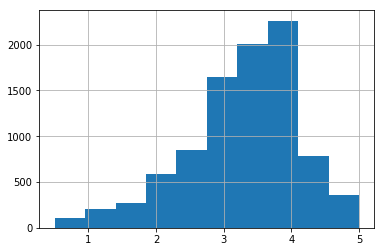

In [54]:
temp['rating'].hist();

In [52]:
# Save algorithm
import pickle
pickle.dump(kmeans, open('modelo', 'wb'))